# Regresión lineal 
En este cuaderno, exploraremos el concepto de regresión lineal y su aplicación práctica mediante un ejemplo en Python. Para comenzar, el primer paso consistirá en la descarga de datos y comprender su contenido.

## Importa las librerias necesarias

In [5]:
# Manipulación de datos
import numpy as np
import pandas as pd
# Visualización
import seaborn as sns
sns.set(style="dark")
%matplotlib inline
import matplotlib.pyplot as plt
# Modelos
## Preparar datos
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
## Regresión lineal
from sklearn.linear_model import LinearRegression
## Evaluación
from sklearn.metrics import mean_squared_error, r2_score

## Importando datos

In [19]:
url_dataset ='https://github.com/tanvirnwu/Feature-Selection--Python/blob/main/Housing.csv'
# Cargar datos
dataset = pd.read_csv(url_dataset, sep=',', header=0)       
# Mostrar los primeros registros
dataset.head()

ParserError: Error tokenizing data. C error: Expected 1 fields in line 41, saw 16


In [4]:
# Ejemplo con descarga de datos desde una URL (asegúrate de tener una conexión a Internet):
# Puedes utilizar diferentes fuentes, por ejemplo, desde un archivo CSV o directamente desde una URL.

dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
df = pd.read_csv(dataset_url, sep="\s+", header=None)
df.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [7]:
casas = fetch_california_housing()
df = pd.DataFrame(casas.data, columns = casas.feature_names)

df['target'] = casas.target

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Entendiendo los datos


In [17]:
print(casas.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [9]:
# Exploración inicial de los datos
print("Exploración inicial de los datos:")
df.head()
print()


Exploración inicial de los datos:



In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


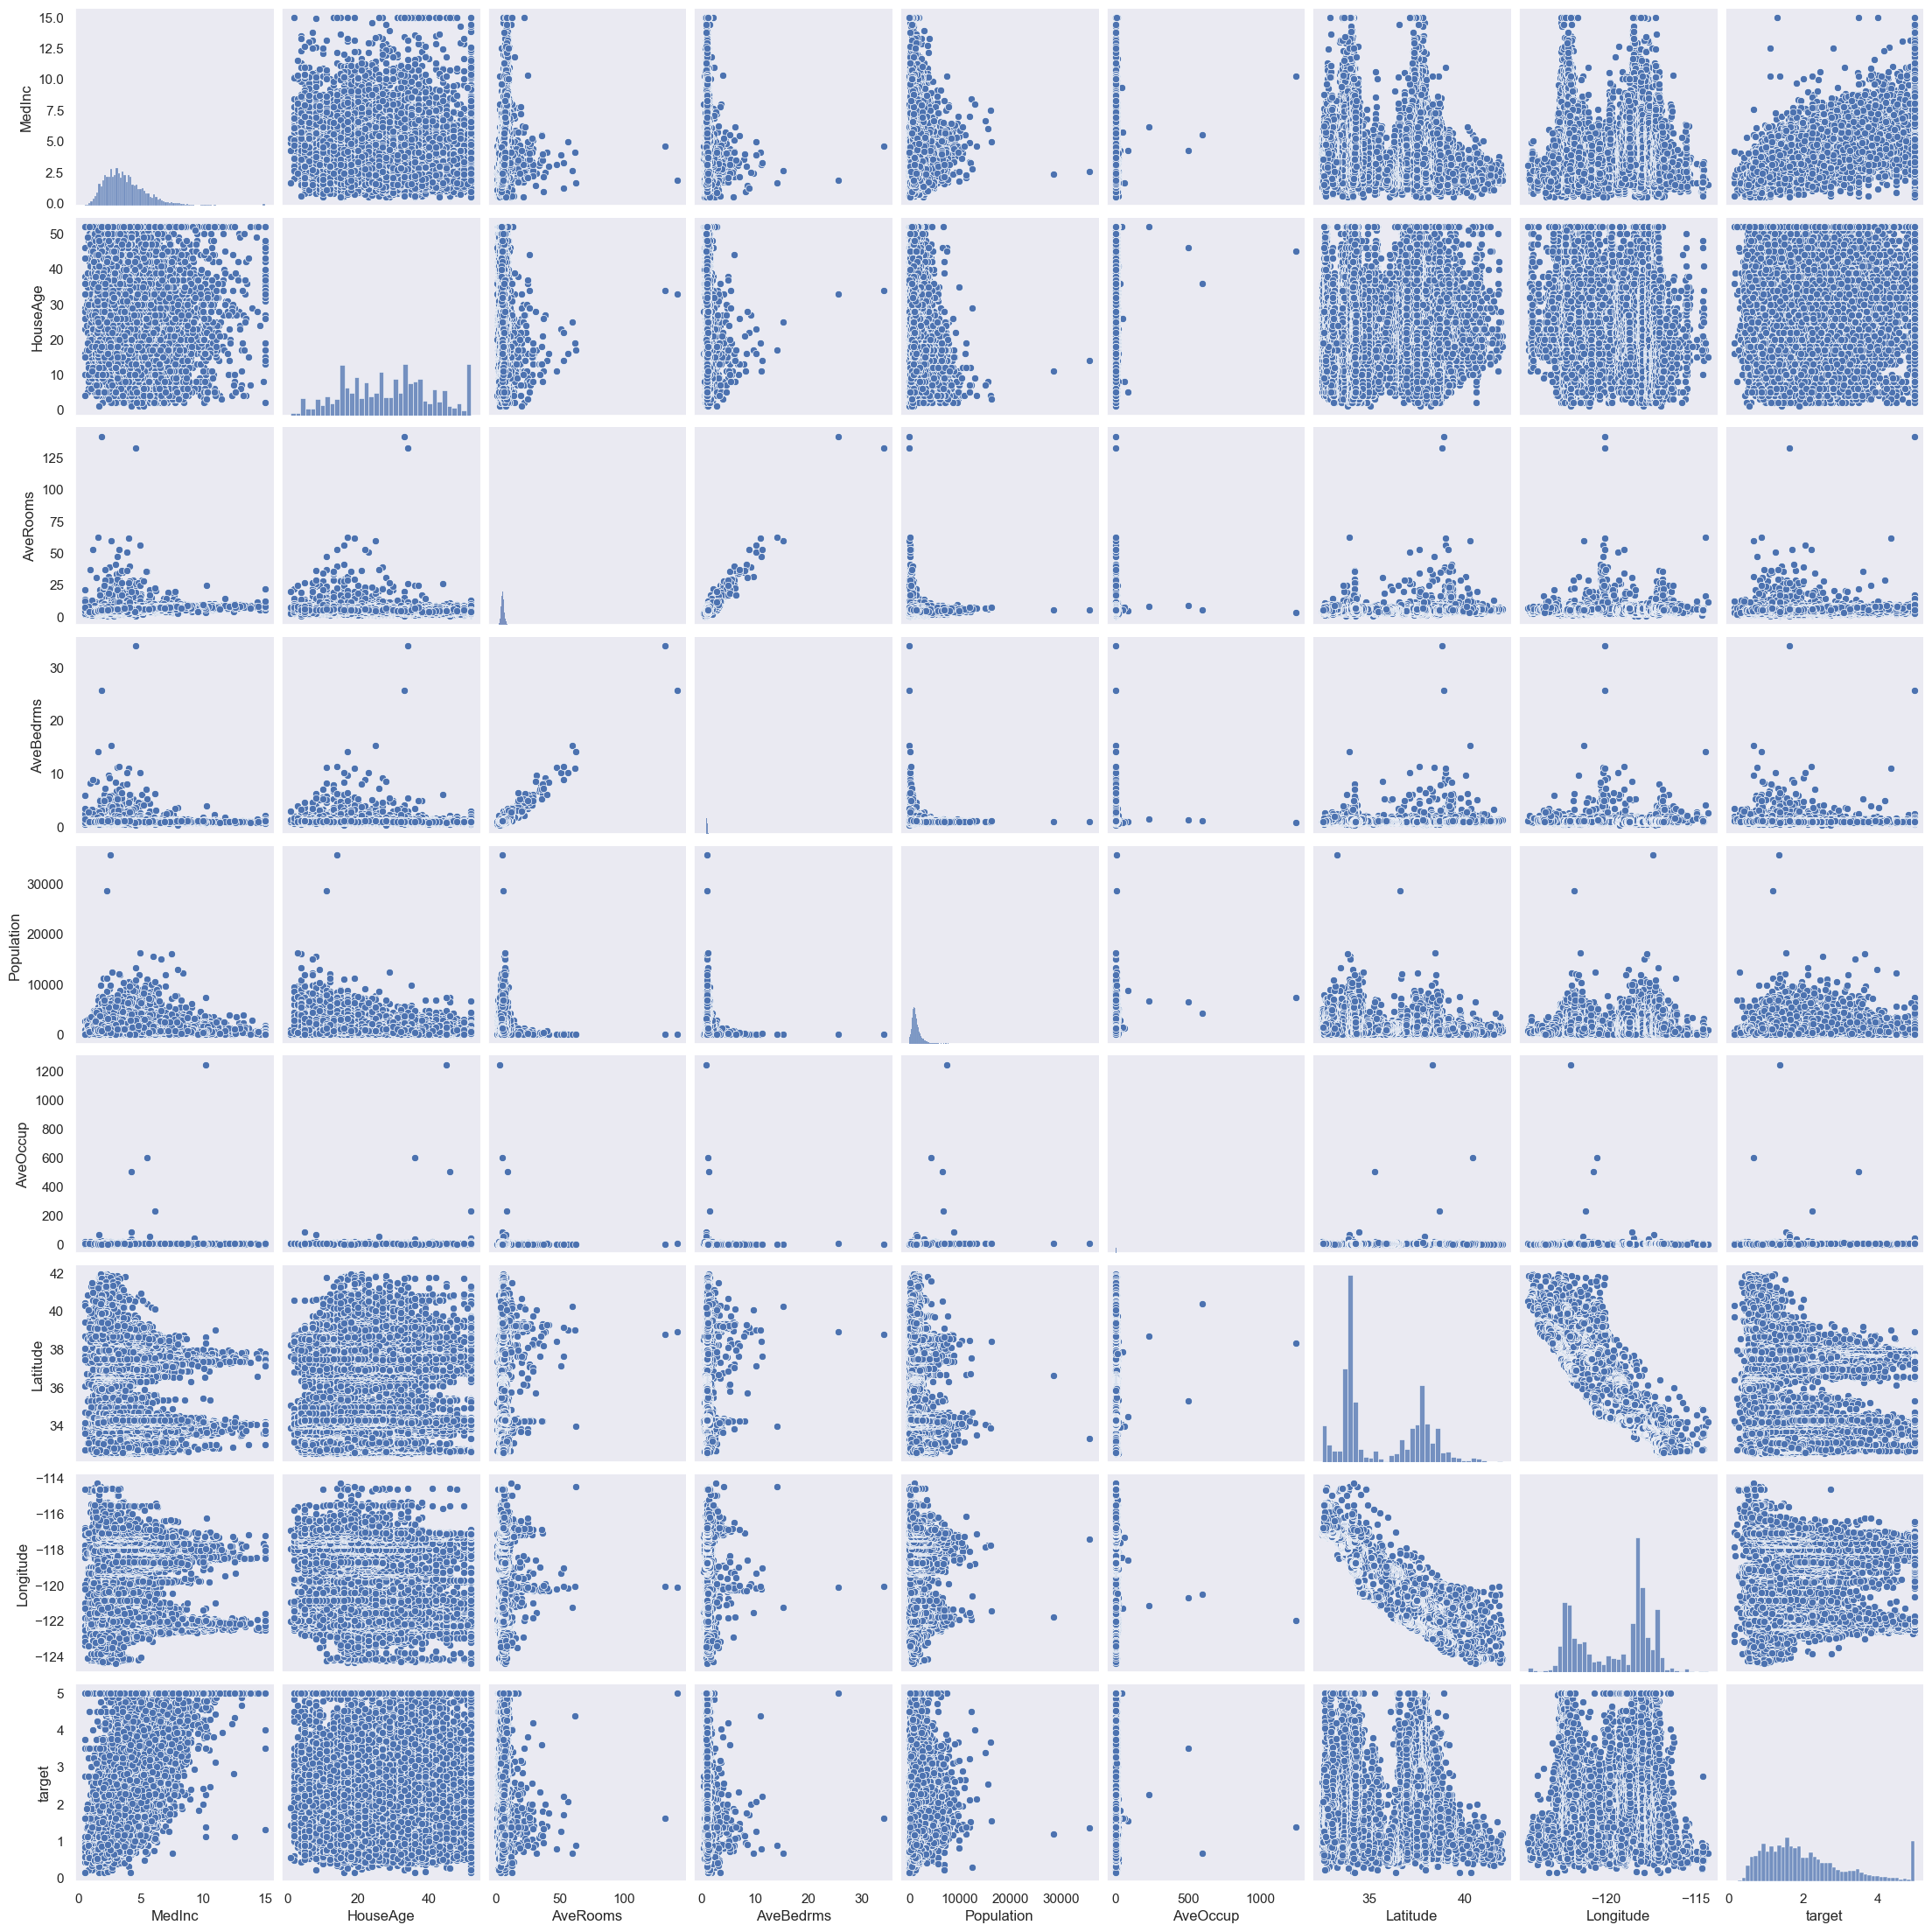

In [8]:
sns.pairplot(df, height=2.5)
plt.show()

<Axes: >

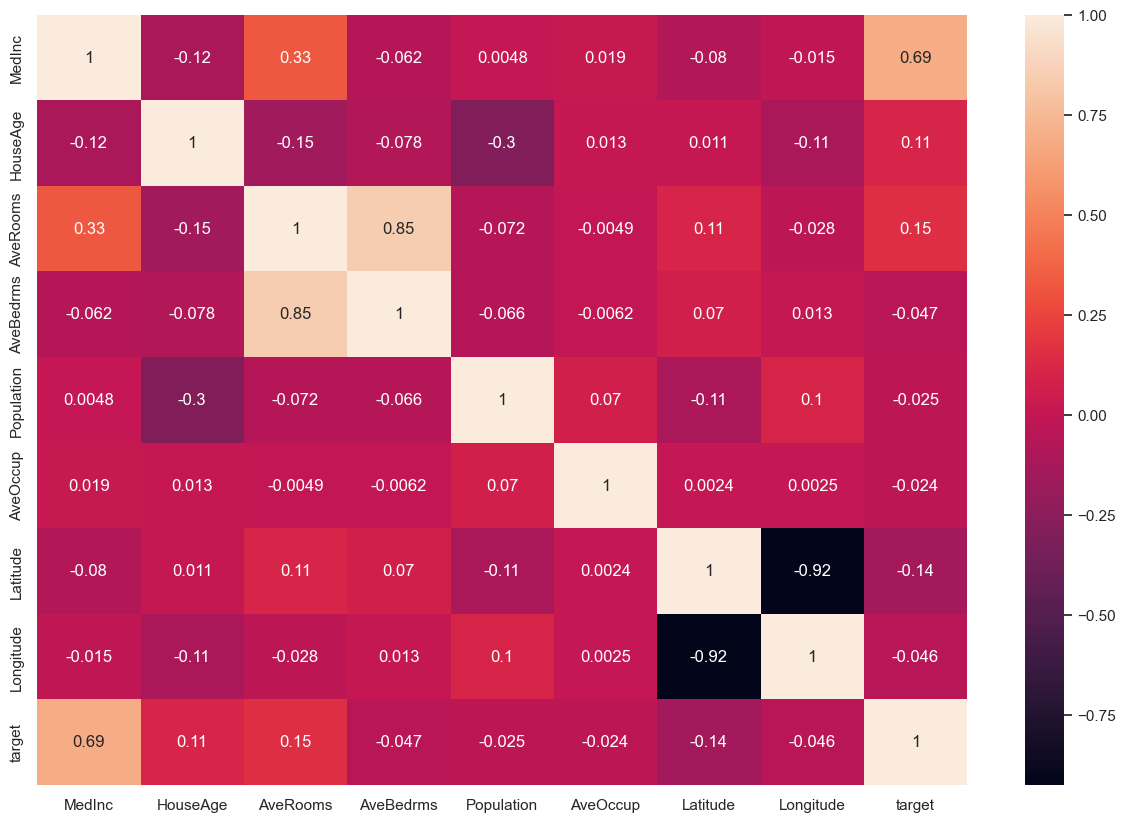

In [12]:
plt.figure(figsize = (15,10))
cor = df.corr()
sns.heatmap(cor, annot=True)

## Creando modelo con scikit-learn

In [ ]:

#datos de entrada o variable independiente
X = df_iris['sepal length in cm'].values.reshape(-1,1)
#datos de salida, o variable dependiente
y = df_iris['petal length in cm'].values.reshape(-1,1)

#transformando datos
estandar_x = StandardScaler()
estandar_y = StandardScaler()

X_std = estandar_x.fit_transform(X)
y_std = estandar_y.fit_transform(y)
# Entrenamiento
regresor = LinearRegression()# definiendo el modelo

regresor.fit(X_std, y_std) #entrenamiento

LinearRegression()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = df_iris['sepal length in cm'].values.reshape(-1, 1)#-1 es para poner el mismo número de filas originale
y = df_iris['petal length in cm'].values.reshape(-1, 1)#1para que se una sola columna

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

regresor = LinearRegression()
regresor.fit(X_std, y_std)

LinearRegression()

## Análisis de resultados

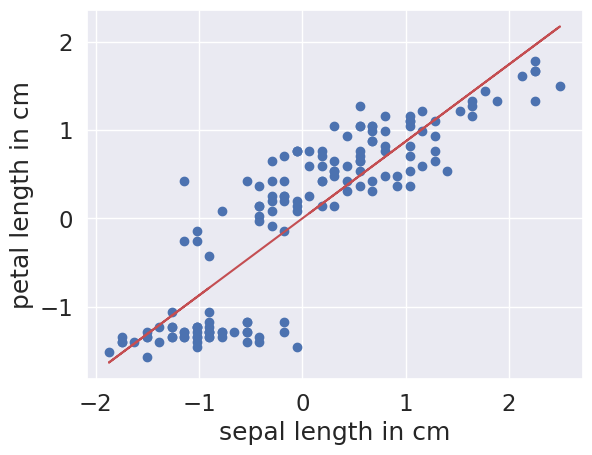

In [ ]:
plt.scatter(X_std,y_std)
plt.plot(X_std,regresor.predict(X_std), color='r')
plt.ylabel("petal length in cm")
plt.xlabel("sepal length in cm")
plt.show()

## Generando predicción con el modelo

In [ ]:
long_sepal = 5 #cm
long_sepal_std = estandar_x.transform(np.array([long_sepal]).reshape(-1,1))
#se aplica transformada inversa
print("La longitud del petalo de una flor con longitud de sepalo 2cm es de ",estandar_y.inverse_transform( regresor.predict(long_sepal_std)))

La longitud del petalo de una flor con longitud de sepalo 2cm es de  [[2.19072152]]


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3e4be8b6-6c74-4684-9aa7-992eab9b3282' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>